In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('C:/DATA SCIENCE/PLACEMENT/Buckman/Sample Data for shortlisting.xlsx')
df.head()

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


# **Data Cleaning**

In [4]:
df.set_index('S. No.',inplace=True)
df.head()

,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
S. No.,,,,,,,,,,,,,,,,,,
1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


In [5]:
def split_income(value):
    value = value.replace(',', '')  # Remove commas if present
    if ' to ' in value:
        # Split the range and convert to integers
        income_range = value.split(' to ')
        lower_income = int(''.join(char for char in income_range[0] if char.isdigit()))
        upper_income = int(''.join(char for char in income_range[1] if char.isdigit()))
    elif 'Above' in value:
        # Extract the upper limit from "Above" format and set lower limit greater
        upper_limit = int(''.join(char for char in value if char.isdigit()))
        lower_income = upper_limit + 1  # Set lower income greater than upper limit
        upper_income = np.inf
    else:
        # Convert the single value to integer
        lower_income = int(''.join(char for char in value if char.isdigit()))
        upper_income = lower_income  # Set upper income equal to lower income for single value
    return lower_income, upper_income

In [6]:
df[['Lower Income', 'Upper Income']] = df['Household Income'].apply(lambda x: pd.Series(split_income(x)))

print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [7]:
mean=df['Upper Income'].mean()
mean_without_inf = df[df['Upper Income'] != np.inf]['Upper Income'].mean()
df['Upper Income'] = np.where((df['Upper Income'] == np.inf) & (mean_without_inf > df['Lower Income']),
                              mean_without_inf, df['Upper Income'])
df['Upper Income']=df['Upper Income'].round(1)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [8]:
df['Upper Income'] = df['Upper Income'].replace(np.inf, 100000)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [9]:
def clean_percentage(value):
    lower_limit = np.nan
    upper_limit = np.nan

    if 'Above' in value:
        digits = ''.join(char for char in value if char.isdigit())
        if digits:
            upper_limit = int(digits)
            lower_limit = upper_limit + 1
    elif 'Upto' in value:
        digits = ''.join(char for char in value if char.isdigit())
        if digits:
            lower_limit = 0
            upper_limit = int(digits)
    elif ' to ' in value:
        value_range = value.split(' to ')
        if len(value_range) >= 2:
            lower_limit_str = value_range[0].rstrip('%')
            upper_limit_str = value_range[1].rstrip('%')
            if lower_limit_str.isdigit() and upper_limit_str.isdigit():
                lower_limit = int(lower_limit_str)
                upper_limit = int(upper_limit_str)
    elif "Don't want to reveal" in value:
        lower_limit = np.nan
        upper_limit = np.nan
    elif value.isdigit():
        lower_limit = int(value)
        upper_limit = lower_limit

    return lower_limit, upper_limit

In [10]:
df[['Lower Percentage', 'Upper Percentage']] = df['Percentage of Investment'].apply(lambda x: pd.Series(clean_percentage(x)))

# Display the modified DataFrame
print(df.head(10))

                 City Gender Marital Status             Age   Education  \
S. No.                                                                    
1            New York    Men  Never Married   Early Working   Secondary   
2            New York  Women        Married   Early Working      Middle   
3             Seattle  Women        Married   Early Working    Teritary   
4       San Francisco    Men  Never Married         Elderly  Uneducated   
5       San Francisco    Men        Married   Prime Working     Primary   
6             Memphis  Women  Never Married   Prime Working     Primary   
7             Seattle  Women  Never Married   Prime Working    Teritary   
8             Houston  Women  Never Married  Mature Working      Middle   
9       San Francisco  Women  Never Married         Elderly      Middle   
10      San Francisco    Men        Married        Children   Secondary   

                                             Role  \
S. No.                                        

In [11]:
mean=df['Lower Percentage'].mean()
df['Lower Percentage'].fillna(mean,inplace=True)
df['Lower Percentage']=df['Lower Percentage'].round(1)
mean=df['Upper Percentage'].mean()
df['Upper Percentage'].fillna(mean,inplace=True)
df['Upper Percentage']=df['Upper Percentage'].round(1)
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [12]:
def clean_experience(value):
    years = np.nan

    if 'Less Than' in value:
        years = 0
    elif 'Above' in value:
        years_str = ''.join(char for char in value if char.isdigit())
        if years_str:
            years = int(years_str) + 1
    elif ' to ' in value:
        value_range = value.split(' to ')
        if len(value_range) >= 2:
            lower_limit_str = value_range[0].rstrip(' Years')
            upper_limit_str = value_range[1].rstrip(' Years')
            if lower_limit_str.isdigit() and upper_limit_str.isdigit():
                lower_limit = int(lower_limit_str)
                upper_limit = int(upper_limit_str)
                years = (lower_limit + upper_limit) // 2  # Average of the range
    elif value.isdigit():
        years = int(value)

    return years


In [13]:
df['Average Investment Experience'] = df['Investment Experience'].apply(clean_experience)
print(df.head(10))

                 City Gender Marital Status             Age   Education  \
S. No.                                                                    
1            New York    Men  Never Married   Early Working   Secondary   
2            New York  Women        Married   Early Working      Middle   
3             Seattle  Women        Married   Early Working    Teritary   
4       San Francisco    Men  Never Married         Elderly  Uneducated   
5       San Francisco    Men        Married   Prime Working     Primary   
6             Memphis  Women  Never Married   Prime Working     Primary   
7             Seattle  Women  Never Married   Prime Working    Teritary   
8             Houston  Women  Never Married  Mature Working      Middle   
9       San Francisco  Women  Never Married         Elderly      Middle   
10      San Francisco    Men        Married        Children   Secondary   

                                             Role  \
S. No.                                        

In [14]:
class_labels = df['Return Earned'].unique()
print(class_labels)

['Negative Return' '10 to 12 ' '1 to 4' '5 to 6' '7 to 9' 'More than 13']


In [15]:
label_encoder = LabelEncoder()

# Fit and transform the "Returns Earned" column
df['Return Encoded'] = label_encoder.fit_transform(df['Return Earned'])

# Display the encoded DataFrame
print(df)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [16]:
columns_newdf=['City','Gender','Marital Status','Age','Education','Role','Number of investors in family','Lower Income','Upper Income',
               'Lower Percentage','Upper Percentage','Source of Awareness about Investment','Average Investment Experience','Risk Level','Reason for Investment','Return Earned']

data=df[columns_newdf]
print(data)

                 City Gender Marital Status            Age   Education  \
S. No.                                                                   
1            New York    Men  Never Married  Early Working   Secondary   
2            New York  Women        Married  Early Working      Middle   
3             Seattle  Women        Married  Early Working    Teritary   
4       San Francisco    Men  Never Married        Elderly  Uneducated   
5       San Francisco    Men        Married  Prime Working     Primary   
...               ...    ...            ...            ...         ...   
806           Seattle    Men        Married  Early Working   Secondary   
807           Seattle    Men  Never Married       Children   Secondary   
808     San Francisco    Men  Never Married       Children  Uneducated   
809           Memphis  Women        Married       Children  Uneducated   
810          New York    Men  Never Married  Prime Working      Middle   

                                     

In [17]:
data.to_excel('modified investments.xlsx',index=False)

# **Data Exploration**

In [18]:
gender_distribution = data['Gender'].value_counts().reset_index()
print(gender_distribution)

   index  Gender
0  Women     427
1    Men     383


In [19]:
marital_status_distribution = df['Marital Status'].value_counts().reset_index()
print(marital_status_distribution)

           index  Marital Status
0  Never Married             405
1        Married             405


In [20]:
age_distribution = df['Age'].value_counts().reset_index()
print(age_distribution)

            index  Age
0  Mature Working  183
1   Prime Working  163
2        Children  159
3         Elderly  158
4   Early Working  147


In [21]:
gender_distribution.columns = ['Gender', 'Count']
marital_status_distribution.columns = ['Marital Status', 'Count']
age_distribution.columns = ['Age', 'Count']
gender_fig = px.pie(gender_distribution, names='Gender', values='Count', title='Gender Distribution')
marital_fig = px.pie(marital_status_distribution, names='Marital Status', values='Count', title='Marital Status Distribution')
age_fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution')

# Show the plots
gender_fig.show()
marital_fig.show()
age_fig.show()


In [22]:
edu = data['Education'].value_counts().reset_index()
print(edu)

role = data['Role'].value_counts().reset_index()
print(role)

lower=data['Lower Income'].value_counts().reset_index()
print(lower)

upper=data['Upper Income'].value_counts().reset_index()
print(upper)

        index  Education
0    Teritary        172
1      Middle        171
2  Uneducated        162
3   Secondary        161
4     Primary        144
                                       index  Role
0                             Top Executives   175
1         Training and Development Executive   172
2              Marketing and Sales Executive   162
3  Computer and Information System Executive   160
4        Advertising and Promotion Executive   141
     index  Lower Income
0  30087.0           123
1   2735.0           121
2  13676.0           118
3   2736.0           115
4  19146.0           115
5   8206.0           114
6  24616.0           104
      index  Upper Income
0  100000.0           123
1    2735.0           121
2   19145.0           118
3    8205.0           115
4   24615.0           115
5   13675.0           114
6   30085.0           104


In [23]:
# edu.columns = ['Education', 'Count']
# role.columns = ['Role', 'Count']
# lower.columns = ['Lower Income in Dollars', 'Count']
# upper.columns = ['Upper Income in Dollars','Count']
grouped_df = df.groupby(['Education', 'Role']).size().reset_index(name='Count')
stacked_fig = px.bar(grouped_df, x='Education', y='Count', color='Role', title='Demographic Distribution',
                      barmode='stack')
stacked_fig.show()

In [24]:
grouped_df = df.groupby(['Role', 'Education']).size().reset_index(name='Count')
sunburst_fig = px.sunburst(grouped_df, path=['Role', 'Education'], values='Count',
                            title='Sunburst Chart - Role, Education')
sunburst_fig.show()

In [25]:
selected_df = df.loc[:, ['Role', 'Lower Income']]

# Melt the DataFrame to create a long-form DataFrame for Plotly Express
melted_df = selected_df.melt(id_vars='Role', var_name='Income Type', value_name='Income')

# Split 'Lower Income' into separate bars based on income values
melted_df['Income Type'] = melted_df['Income Type'] + '_' + melted_df['Income'].astype(str)

# Create clustered column chart with no separators within bars
clustered_fig = px.bar(melted_df, x='Role', y='Income', color='Income Type',
                        barmode='group', title='Clustered Column Chart - Role vs.Lower Income')


# Show the plot
clustered_fig.show()

In [26]:
selected_df = df.loc[:, ['Role', 'Upper Income']]

# Melt the DataFrame to create a long-form DataFrame for Plotly Express
melted_df = selected_df.melt(id_vars='Role', var_name='Income Type', value_name='Income')

# Split 'Lower Income' into separate bars based on income values
melted_df['Income Type'] = melted_df['Income Type'] + '_' + melted_df['Income'].astype(str)

# Create clustered column chart with no separators within bars
clustered_fig = px.bar(melted_df, x='Role', y='Income', color='Income Type',
                        barmode='group', title='Clustered Column Chart - Role vs. Upper Income')


# Show the plot
clustered_fig.show()

In [27]:
sunburst_fig = px.sunburst(data, path=['City', 'Number of investors in family'], values='Number of investors in family',
                            title='Sunburst Chart - City and Number of Investors')

# Show the plot
sunburst_fig.show()

In [28]:
low = df['Lower Percentage'].value_counts().reset_index()
print(low)

high=df['Upper Percentage'].value_counts().reset_index()
print(high)

   index  Lower Percentage
0   27.0               130
1    0.0               122
2    6.0               122
3   21.0               117
4   11.0               113
5   13.6               104
6   16.0               102
   index  Upper Percentage
0   26.0               130
1    5.0               122
2   10.0               122
3   25.0               117
4   15.0               113
5   16.8               104
6   20.0               102


In [29]:
edu.columns = ['Lower Percentage', 'Count']
role.columns = ['Upper Percentage', 'Count']
fig = px.bar(data, x="City", y=["Lower Percentage", "Upper Percentage"], title="Upper and Lower Investment Percent")
fig.show()

In [30]:
risk_return_counts = data.groupby(['Return Earned', 'Risk Level']).size().reset_index(name='Count')

# Create a bar chart to visualize the relationship between 'Return' and 'Risk'
bar_chart = px.bar(risk_return_counts, x='Return Earned', y='Count', color='Risk Level',
                    title='Relationship between Return and Risk',
                    labels={'Return': 'Return Level', 'Count': 'Frequency'})

# Show the plot
bar_chart.show()

# **Best Investment Decision**

In [58]:
label_encoder = LabelEncoder()

# Initialize an empty dictionary to store mappings
label_mappings = {}

# Loop through each column
for column in data.columns:
    # Check if the column contains categorical data (non-numeric)
    if data[column].dtype == 'object':
        # Apply Label Encoding
        data[column] = label_encoder.fit_transform(data[column])
        
        # Get unique values and their corresponding labels
        unique_values = data[column].unique()
        encoded_labels = label_encoder.transform(unique_values)
print(data)

        City  Gender  Marital Status  Age  Education  Role  \
S. No.                                                       
1          2       0               1    1          2     2   
2          2       1               0    1          0     0   
3          4       1               0    1          3     4   
4          3       0               1    2          4     4   
5          3       0               0    4          1     1   
...      ...     ...             ...  ...        ...   ...   
806        4       0               0    1          2     3   
807        4       0               1    0          2     3   
808        3       0               1    0          4     0   
809        1       1               0    0          4     2   
810        2       0               1    4          0     4   

        Number of investors in family  Lower Income  Upper Income  \
S. No.                                                              
1                                   2        2736.0    

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\dhivy\AppData\Roaming\Pytho

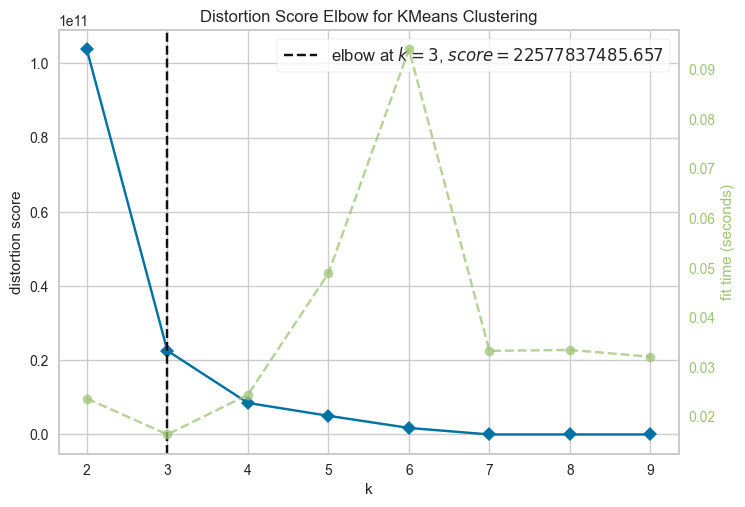

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [89]:
# Apply k-means clustering with the optimal k value
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Display the DataFrame with cluster labels
print(data.head())

C:\Users\dhivy\AppData\Local\Temp\ipykernel_25432\1853159288.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



        City  Gender  Marital Status  Age  Education  Role  \
S. No.                                                       
1          2       0               1    1          2     2   
2          2       1               0    1          0     0   
3          4       1               0    1          3     4   
4          3       0               1    2          4     4   
5          3       0               0    4          1     1   

        Number of investors in family  Lower Income  Upper Income  \
S. No.                                                              
1                                   2        2736.0        8205.0   
2                                   2       19146.0       24615.0   
3                                   2        2736.0        8205.0   
4                                   5       19146.0       24615.0   
5                                   2       13676.0       19145.0   

        Lower Percentage  Upper Percentage  \
S. No.                             

In [90]:
data.to_excel('with decision.xlsx')

In [92]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

C:\Users\dhivy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 2 0 2 2 2 2 1 2 2 2 0 0 1 2 2 2 0 2 0 0 0 0 0 0 2 2 2 2 1 0 1 1 0 0 2 2
 0 0 0 0 2 1 2 0 0 0 0 2 2 2 2 0 2 2 0 0 0 2 1 1 1 2 1 2 0 0 2 2 1 2 2 2 0
 2 1 2 0 2 0 1 0 2 2 0 0 0 0 2 2 0 0 2 0 2 0 2 2 0 1 0 0 2 2 2 2 2 2 0 2 1
 0 0 0 2 0 0 2 0 0 0 0 1 0 0 2 0 2 2 0 2 1 1 0 2 2 0 1 0 0 2 0 0 0 2 1 0 2
 2 0 2 2 0 2 2 1 2 0 2 2 2 0 0 0 2 1 1 0 0 2 1 0 2 0 1 0 0 0 2 0 2 0 1 0 2
 0 2 0 2 1 2 0 0 0 2 0 2 2 0 2 1 0 1 2 0 0 2 2 0 1 2 0 0 2 0 2 0 2 0 2 2 2
 0 1 0 0 0 2 0 2 1 0 0 1 0 0 2 0 0 1 2 2 2 0 2 2 2 2 0 1 1 2 2 0 1 0 2 0 0
 2 0 0 0 0 2 0 2 0 0 1 2 2 2 2 2 0 2 1 0 0 0 0 0 0 2 0 2 0 0 0 1 0 1 1 1 1
 2 1 1 0 2 2 1 0 0 0 2 0 0 2 0 0 2 2 0 0 0 2 0 1 0 0 2 0 2 2 2 2 2 0 2 0 1
 1 0 0 0 1 1 0 2 0 0 0 2 2 0 0 0 0 1 2 1 2 2 0 0 2 2 0 2 0 1 2 0 2 1 1 0 2
 0 2 2 1 0 0 2 2 2 2 0 2 0 1 2 2 1 2 0 2 0 1 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0
 2 2 2 0 2 0 0 2 0 0 2 0 2 0 0 0 2 1 2 2 1 2 0 2 0 1 2 0 2 0 0 1 2 1 2 2 2
 2 0 2 0 0 0 1 2 2 2 0 2 1 2 2 2 0 0 2 1 1 1 0 2 0 2 2 2 1 2 2 0 0 2 0 2 0
 0 0 2 0 2 2 1 0 1 0 2 1 